# Waiter Tips Prediction

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("tips.csv")
print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


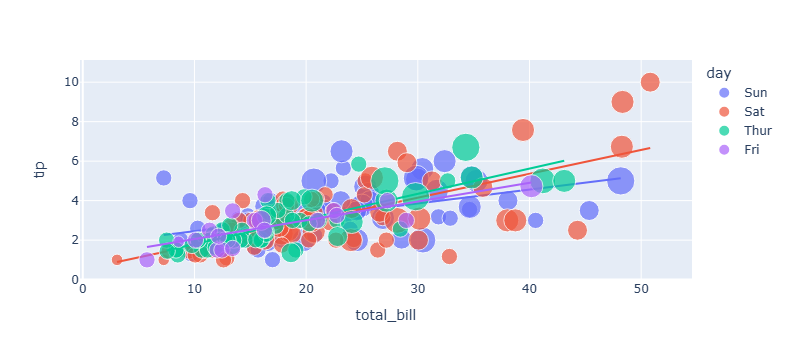

In [27]:
# Figure showing tip according to the total bill paid, Number of people at the table and the day of the week
figure = px.scatter(data_frame = data, x = "total_bill",
                   y = "tip", size = "size", color = "day", trendline = "ols")
figure.show()

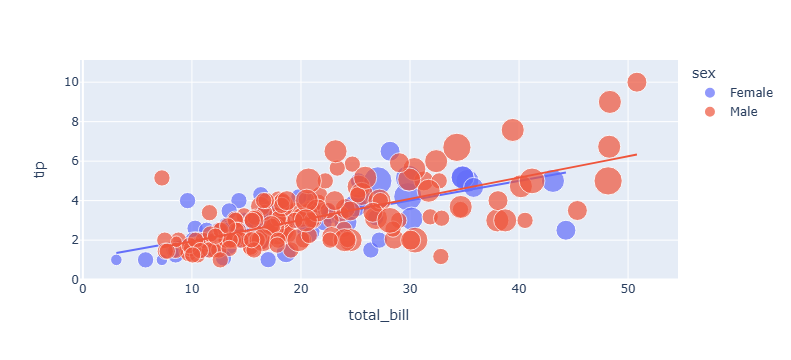

In [28]:
#Tip given according to the total bill paid, the number of people at a table and 
##the gender of the person paying the bill

figure = px.scatter(data_frame = data, x = "total_bill",
                   y = "tip", size = "size", color = "sex", trendline = "ols")
figure.show()



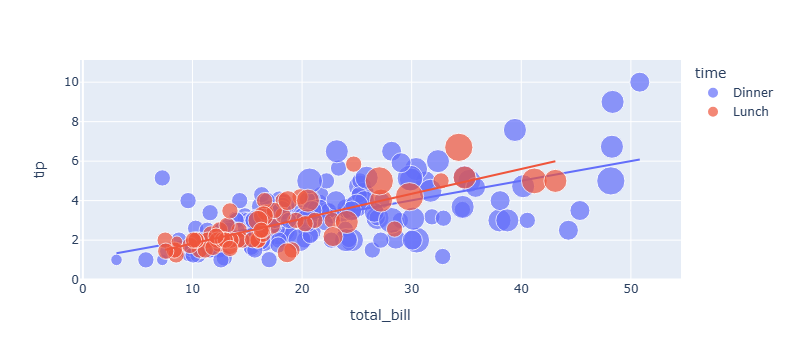

In [29]:
# Tip given accroding to the total bill paid, the number of the people at a table and the time of the mean
figure = px.scatter(data_frame = data, x = "total_bill", y = "tip",
                   size = "size", color = "time", trendline = "ols")
figure.show()

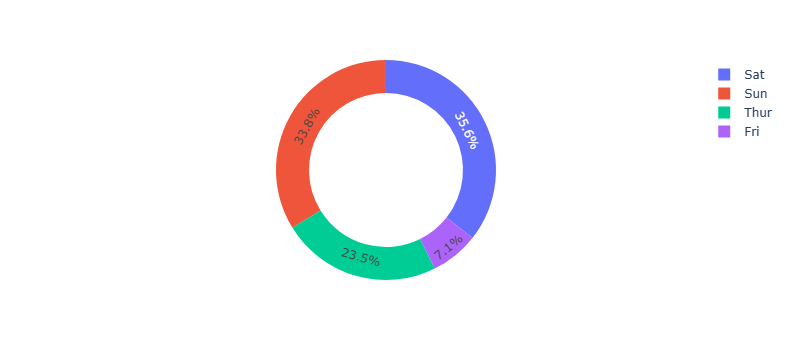

In [30]:
# tips given according to days
figure = px.pie(data,
               values = "tip",
               names = "day", hole = 0.7)
figure.show()

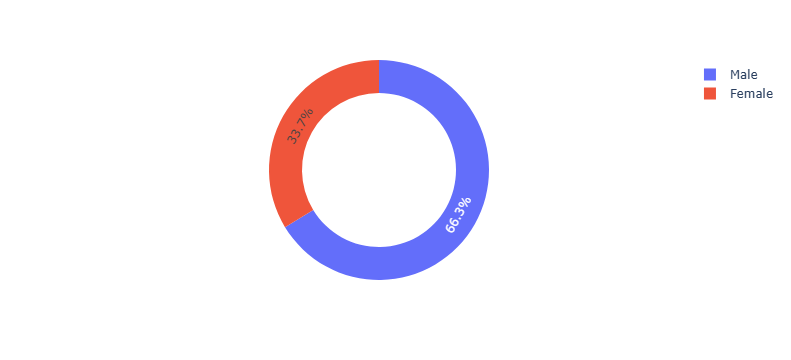

In [8]:
# The number of tips by gender of the person paying the bill
figure = px.pie(data,
               values = "tip",
               names = "sex",
               hole = 0.7)
figure.show()

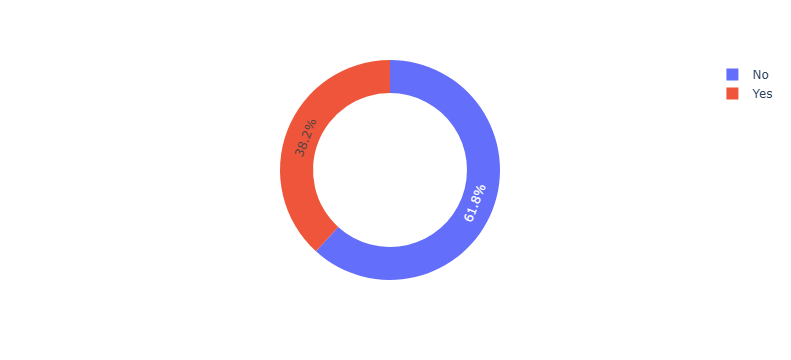

In [31]:
# do smokers tip more or non-smokers
figure = px.pie(data,
               values = "tip",
               names = "smoker",
               hole = 0.7)
figure.show()

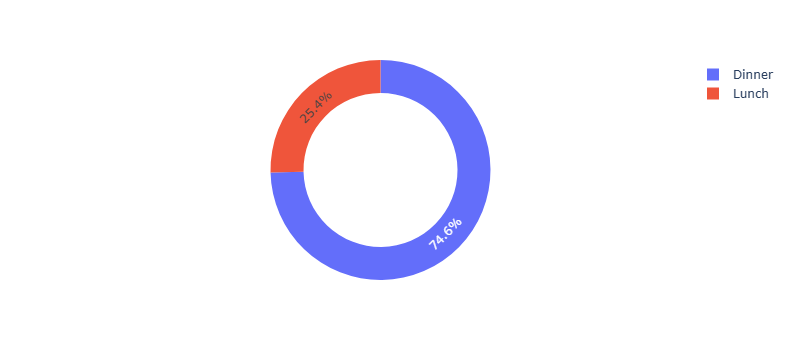

In [32]:
# are most tips given during lunch or dinner
figure = px.pie(data,
               values = "tip",
               names = "time",
               hole = 0.7)
figure.show()

## Waiter Tips Prediction Model

In [33]:
# Tranforming categorical values in numeric value

data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [34]:
# Now we will split the data into training and test sets
x = np.array(data[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                               test_size = 0.2,
                                               random_state = 42)


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]

features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])